In [1]:
# Imports
import numpy as np
import time
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.backend import clear_session
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from scipy.stats import randint as sp_randint
from keras.layers import LeakyReLU
from sklearn.metrics import make_scorer, cohen_kappa_score, accuracy_score, f1_score, precision_score, recall_score
from collections import defaultdict

from utility4 import load_data, plot_learning_curves, report, plot_lines1, cluster_plots1#, #run_exp_nn

Using TensorFlow backend.


clucka clucka!!!
pookie bottom buttock!


In [2]:
#X_train_m, X_val_m, X_test_m, y_train_m, y_val_m, y_test_m, class_names_m = load_data('motions', scale=True, valset=True)
#X_train_p, X_val_p, X_test_p, y_train_p, y_val_p, y_test_p, class_names_p = load_data('particles', scale=True, valset=True)
X_train, X_val, X_test, y_train, y_val, y_test, class_names = load_data('motions', scale=True, valset=True)

# Load Data from the DR Algorithms

pca_m_data = np.load('pca_m_data.npy')
pca2_m_data = np.load('pca2_m_data.npy')
ica_m_data = np.load('ica_m_data.npy')
rca_m_data = np.load('rca_m_data.npy')
tsne_m_data = np.load('ica_m_tsne_X.npy')

[X_pca_m, X_val_pca_m, pca_m] = pca_m_data
[X_pca2_m, X_val_pca2_m, pca2_m] = pca2_m_data
[X_ica_m, X_val_ica_m, ica_m] = ica_m_data
[X_rca_m, X_val_rca_m, rca_m] = rca_m_data
X_tsne_m = tsne_m_data


########## BEST FOUND PARAMETERS from HW1 #####
n1 = 75
n2 = 14
mid_act = 'relu' #useleakyrelu is enabled...
num_layers = 3
optimizer = 'adam'
activation = 'sigmoid' 
epo = 100 #10
bat = 44 #18
##############################################

motions shapes: (11678, 64), (11678, 1)


In [3]:
# import cluster data for part 5

[pca_y_m, pca2_y_m, ica_y_m, rca_y_m, tsne_y_m, base_y_m] = np.load('motions_kmeans.npy')
[pca_y2_m, pca2_y2_m, ica_y2_m, rca_y2_m, tsne_y2_m, base_y2_m] = np.load('motions_em.npy')

In [24]:
#Build the model
useLeakyReLU = True  # as an "advanced" activation function, it must be added as its own layer not as a parameter on another layer

if useLeakyReLU == False:
    def classification_model(n1=n1, n2=n2, n3 =n2, input_dim=64, mid_act = mid_act, num_layers = num_layers, optimizer = optimizer, activation = activation):
        model = Sequential()
        model.add(Dense(n1, input_dim=input_dim, activation=mid_act))
        model.add(Dense(n2, activation=mid_act))
        for i in range(num_layers-2):
            model.add(Dense(n3, activation=mid_act))
        model.add(Dense(4, activation=activation))
        model.compile(optimizer= optimizer,
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])
        return model
else:
    def classification_model(n1=n1, n2=n2, n3 =n2, input_dim=64, mid_act = mid_act, 
                             num_layers = num_layers, optimizer = optimizer, 
                             activation = activation, epo=20, bat=46):
        model = Sequential()
        model.add(Dense(n1, input_dim=input_dim))
        model.add(LeakyReLU())
        model.add(Dense(n2))
        model.add(LeakyReLU())
        for i in range(num_layers-2):
            model.add(Dense(n3))
            model.add(LeakyReLU())
        model.add(Dense(4, activation=activation))
        model.compile(optimizer= optimizer,
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])
        return model

#model = KerasClassifier(build_fn=classification_model, epochs=epo, batch_size=bat, verbose=0)

scorer = make_scorer(cohen_kappa_score)

Fit time = 71.596200466156
Pred time = 71.68980050086975
rock accuracy =   0.8845
paper accuracy =   0.8143
scissors accuracy =   0.7292
okay accuracy =   0.6952
Cohen Kappa: 0.7075020239994229


Accuracy: 0.7806313536650615
F1 Score: 0.7815555831744128
Precision: 0.7830416146440848
Recall: 0.7806313536650615


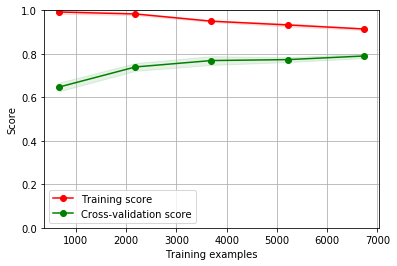

time elapsed: 863.1028051376343


In [35]:
#Truncated PCA
pca_model = finalModel(X_pca_m_scaled, y_train, X_val_pca_m_scaled, y_val, learning_curves=True, other_params=other_params)

Fit time = 22.297800302505493
Pred time = 22.323800325393677
rock accuracy =   0.9608
paper accuracy =   0.9451
scissors accuracy =   0.9021
okay accuracy =   0.9123
Cohen Kappa: 0.9065475031775658
Accuracy: 0.9299090422685928
F1 Score: 0.9298101928157596
Precision: 0.9300004542585112
Recall: 0.9299090422685928


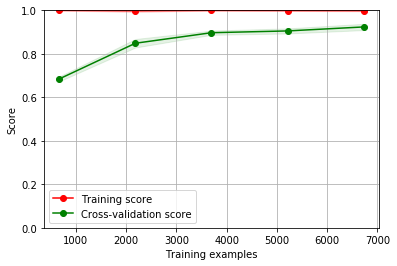

time elapsed: 777.7676043510437


In [7]:
clear_session() #clear the keras session - omg so important!!!!
# #Full PCA
pca2_model = finalModel(X_pca2_m, y_train, X_val_pca2_m, y_val, learning_curves=True)

Fit time = 22.505000352859497
Pred time = 22.55400013923645
rock accuracy =   0.9564
paper accuracy =   0.9451
scissors accuracy =   0.9062
okay accuracy =   0.8816
Cohen Kappa: 0.896545642571408
Accuracy: 0.922418405564473
F1 Score: 0.9224053730602458
Precision: 0.9224056521441175
Recall: 0.922418405564473


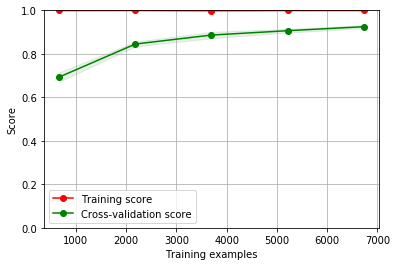

time elapsed: 937.7464048862457


In [9]:
clear_session() #clear the keras session - omg so important!!!!
#Base
base_model = finalModel(X_train, y_train, X_val, y_val, learning_curves=True)

Fit time = 58.63100051879883
Pred time = 58.69440031051636
rock accuracy =   0.9303
paper accuracy =   0.9557
scissors accuracy =   0.8958
okay accuracy =   0.8180
Cohen Kappa: 0.8672486381523551
Accuracy: 0.9004815409309791
F1 Score: 0.9009857087012685
Precision: 0.9029345344641829
Recall: 0.9004815409309791


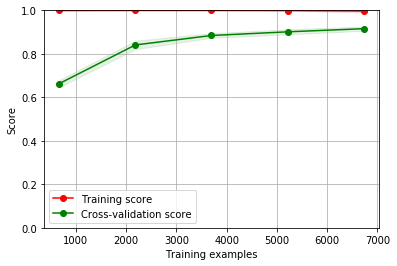

time elapsed: 871.6062054634094


In [29]:
clear_session() #clear the keras session - omg so important!!!!
# ICA
ica_model = finalModel(X_ica_m_scaled, y_train, X_val_ica_m_scaled, y_val, learning_curves=True, other_params = ica_params)

Fit time = 21.313600301742554
Pred time = 21.36240029335022
rock accuracy =   0.9150
paper accuracy =   0.8903
scissors accuracy =   0.8417
okay accuracy =   0.8421
Cohen Kappa: 0.8295087485873216
Accuracy: 0.8721241305510968
F1 Score: 0.8716247454844681
Precision: 0.8717783358626454
Recall: 0.8721241305510968


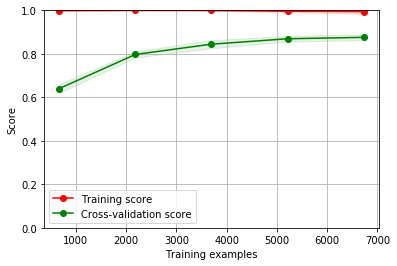

time elapsed: 953.9480037689209


In [17]:
clear_session() #clear the keras session - omg so important!!!!
# RCA
rca_model = finalModel(X_rca_m, y_train, X_val_rca_m, y_val, learning_curves=True)

Fit time = 20.54640007019043
Pred time = 20.671200037002563
rock accuracy =   0.8282


paper accuracy =   0.9397
scissors accuracy =   0.8180
okay accuracy =   0.7517
Cohen Kappa: 0.7792865086962051
Accuracy: 0.8344707614077345
F1 Score: 0.8352431606169386


Precision: 0.8402388211231164
Recall: 0.8344707614077345


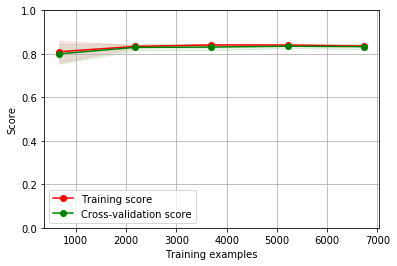

time elapsed: 882.982405424118


In [ ]:
clear_session() #clear the keras session - omg so important!!!!
# TSNE
tsne_model = finalModel(X_tsne_m_scaled, y_train, X_tsne_m_scaled, y_train, learning_curves=True)

In [4]:
print('yippie kai yai yay!')


yippie kai yai yay!


In [21]:
param_name = 'bat'   #we need to use proper names now... 
param_range = range(16, 56, 2) 
other_params = {'n1':218, 'n2': 218, 'n3':256, 'num_layers':3, 'optimizer':'nadam', 'activation':'softmax', 'epo':15, 'bat':46} #epo=100, 'n1':75, 
#result = run_exp_nn(X_ica_m_scaled, y_train, X_val_ica_m_scaled, y_val, param_name, param_range, other_params, verbose=True)
#np.save('dr_nn_result_ica_epo', result)
ica_params = other_params

In [ ]:
cluster_plots1(result, show_computation_time=True, log_likely_score=True)

In [36]:
from sklearn.preprocessing import StandardScaler
scaler_pca = StandardScaler()
X_pca_m_scaled = scaler_pca.fit_transform(X_pca_m)
X_val_pca_m_scaled = scaler_pca.transform(X_val_pca_m)
scaler_ica = StandardScaler()
X_ica_m_scaled = scaler_ica.fit_transform(X_ica_m)
X_val_ica_m_scaled = scaler_ica.transform(X_val_ica_m)
scaler_tsne = StandardScaler()
X_tsne_m_scaled = scaler_tsne.fit_transform(X_tsne_m)
X_val_tsne_m_scaled = scaler_tsne.transform(X_val_tsne_m)

NameError: name 'X_val_tsne_m' is not defined

In [15]:
def run_exp_nn(X_train, y_train, X_val, y_val, param_name, param_range, other_params, verbose=False):

    result = defaultdict(list)

    if X_train.shape[1] != X_val.shape[1]:
        print("shape mismatch between X_train and X_val")
    if X_train.shape[0] != y_train.shape[0]:
        print("shape mismatch between X_train and y_train")
    if X_val.shape[0] != y_val.shape[0]:
        print("shape mismatch between X_val and y_val")

    '''
    ########## BEST FOUND PARAMETERS from HW1 #####
    n1 = 75
    n2 = 14
    mid_act = 'relu'  # useleakyrelu is enabled...
    num_layers = 3
    optimizer = 'adam'
    activation = 'sigmoid'
    epo = 100  # 10
    bat = 44  # 18
    ##############################################
    '''

    for param in param_range:

        result['param'].append(param)
        params = {param_name: param}
        params.update(other_params)
        result['all_params'].append(params)
        result['metrics'].append('accuracy')
        # Motions
        t0 = time.time()

        num_features = X_train.shape[1]
        def classification_model(n1=75, n2=14, n3=14, num_layers=3,  input_dim=num_features,
                                 optimizer='adam', activation='sigmoid', epo=100, bat=44):
            model = Sequential()
            model.add(Dense(n1, input_dim=64))
            model.add(LeakyReLU())
            model.add(Dense(n2))
            model.add(LeakyReLU())
            for i in range(num_layers - 2):
                model.add(Dense(n3))
                model.add(LeakyReLU())
            model.add(Dense(4, activation=activation))
            model.compile(optimizer=optimizer,
                          loss='sparse_categorical_crossentropy',
                          metrics=['accuracy'])
            return model

        model = KerasClassifier(build_fn=classification_model, verbose=0, **params)

        model.fit(X_train, y_train)
        y_pred = model.predict(X_train)
        y_val_pred = model.predict(X_val)
        
        a = accuracy_score(y_train, y_pred)
        b = accuracy_score(y_val, y_val_pred)
        t = time.time() - t0
        
        result['accuracy_m'].append(a)
        result['accuracy_val_m'].append(b)
        result['time'].append(t)
        if verbose:
            print('param {p} run reached {a:.4f} train and {b:.4f} test accuracy in {t:.2f} seconds'.format(p=param, a=a, 
                                                                                                            b=b, 
                                                                                                            t=t))
    # matplotlib is clunky in trying to plot bars side by side, BUT
    #plot_lines1(result['param_range'], result['time'], result['param'], result['param_range'])
        clear_session()
    return result

In [33]:
# Final Model
#finalModel = True
def finalModel(X_train, y_train, X_test, y_test, learning_curves = True, classification_model=classification_model, class_names=class_names, other_params=None):
    clear_session()
    ########## BEST FOUND PARAMETERS from HW1 #####
    n1 = 75
    n2 = 14
    mid_act = 'relu' #useleakyrelu is enabled...
    num_layers = 3
    optimizer = 'adam'
    activation = 'sigmoid' 
    epo = 100 #10
    bat = 44 #18
    ##############################################
    t0 = time.time()
    best_model = KerasClassifier(build_fn=classification_model, input_dim=23, verbose=0, **other_params) # input_dim=X_train.shape[1],
    #model3 = KerasClassifier(build_fn=classification_model, optimizer='rmsprop', epochs=epo, batch_size=bat, verbose=0)
    
    t_fit = time.time()
    best_model.fit(X_train, y_train, batch_size=bat, epochs=epo)  #train on the whole training set
    print("Fit time = {}".format(time.time()-t_fit))
    t_pred = time.time()
    y_pred = best_model.predict(X_test)
    print("Pred time = {}".format(time.time()-t_fit))
    for motion_type in class_names:
        pred_score = best_model.score(X_test[y_test == motion_type], y_test[y_test == motion_type])
        print("{} accuracy = {p:8.4f}".format(motion_type, p=pred_score))
    print("Cohen Kappa: {}".format(cohen_kappa_score(y_pred, y_test)))   
    print("Accuracy: {}".format(accuracy_score(y_pred, y_test)))
    print("F1 Score: {}".format(f1_score(y_pred, y_test, average='weighted')))
    print("Precision: {}".format(precision_score(y_pred, y_test, average='weighted')))
    print("Recall: {}".format(recall_score(y_pred, y_test, average='weighted')))

    #learning_curves = True
    if learning_curves:
        clear_session()
        estimator = KerasClassifier(build_fn=classification_model, input_dim=X_train.shape[1], epochs=epo, batch_size=bat, verbose=0)
        #scorer = make_scorer(cohen_kappa_score)
        plot_learning_curves(estimator, X_train, y_train, title = "Neural Network - Motions Set - Post-Tuning Learning Curves", low_limit=0.0, ravel=False)
    
    print("time elapsed: {}".format(time.time()-t0))

In [ ]:
# References
# https://www.tensorflow.org/tutorials/keras/basic_classification
# https://machinelearningmastery.com/multi-class-classification-tutorial-keras-deep-learning-library/
# http://thedatascientist.com/performance-measures-cohens-kappa-statistic/
# https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_randomized_search.html#sphx-glr-auto-examples-model-selection-plot-randomized-search-py